
# Линейная регрессия


In [1]:
from sklearn import preprocessing # для нормализации
from sklearn.linear_model import LinearRegression # Класс для осуществления регрессии
from sklearn.model_selection import train_test_split # Разделение данных на тестовые и тренировочные

import numpy as np # Работа с данными
import pandas as pd
import matplotlib.pyplot as plt # Строим графики

import seaborn as sns # Для визуализации данных
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


*Загружаем датасет*

In [2]:
dataset = pd.read_csv("./Indexes_by_year.csv", delimiter = ",")

**Анализируем датафрейм**

In [3]:
dataset

,Rank,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index,Year
0,1,Switzerland,190.82,110.96,78.65,74.47,131.75,8.42,28.73,20.09,80.05,2021
1,2,Denmark,190.01,94.73,73.28,79.96,91.67,6.66,28.69,20.40,81.8,2021
2,3,Netherlands,183.31,83.89,72.78,75.76,78.64,7.35,27.81,25.28,87.11,2021
3,4,Finland,182.79,89.05,72.99,76.40,77.46,8.64,28.96,11.86,56.64,2021
4,5,Austria,182.37,78.23,74.77,78.40,75.49,10.40,25.68,19.20,77.79,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
684,47,Russia,-7.39,44.05,49.43,35.52,69.37,14.41,47.83,104.67,-,2012
685,48,Ukraine,-14.61,27.22,44.61,40.28,51.68,16.68,33.00,100.24,-,2012
686,49,Egypt,-22.17,27.17,55.69,65.74,50.77,11.81,59.00,125.71,-,2012
687,50,Iran,-35.23,46.38,48.14,43.40,54.32,12.48,73.50,131.85,-,2012


In [4]:
print(dataset.dtypes) # Отбираем только числовые показатели, не имеющие null
print(pd.isnull(dataset).any())

Rank                                int64
Country                            object
Quality of Life Index             float64
Purchasing Power Index            float64
Safety Index                      float64
Health Care Index                 float64
Cost of Living Index              float64
Property Price to Income Ratio    float64
Traffic Commute Time Index        float64
Pollution Index                   float64
Climate Index                      object
Year                                int64
dtype: object
Rank                              False
Country                           False
Quality of Life Index             False
Purchasing Power Index            False
Safety Index                      False
Health Care Index                 False
Cost of Living Index              False
Property Price to Income Ratio    False
Traffic Commute Time Index        False
Pollution Index                   False
Climate Index                     False
Year                              False
dt

In [5]:
# Удаляем лишние столбцы и разделяем данные на целевые и характеристики.
intFilter = np.array(dataset[[
                             "Rank",
                             "Purchasing Power Index",
                             "Safety Index",
                             "Health Care Index",
                             "Cost of Living Index",
                             "Property Price to Income Ratio",
                             "Traffic Commute Time Index",
                             "Pollution Index"]
                             ])

# intFilter = dataset.drop(["Quality of Life Index", "Rank", "Country", "Climate Index", "Year"], axis=1) # Удаляем ненужные столбцы из датасета

# Представим наши массивы в numpy
X = np.array(intFilter) # data
Y = np.array(dataset["Quality of Life Index"]) # target

intFilter


array([[  1.  , 110.96,  78.65, ...,   8.42,  28.73,  20.09],
       [  2.  ,  94.73,  73.28, ...,   6.66,  28.69,  20.4 ],
       [  3.  ,  83.89,  72.78, ...,   7.35,  27.81,  25.28],
       ...,
       [ 49.  ,  27.17,  55.69, ...,  11.81,  59.  , 125.71],
       [ 50.  ,  46.38,  48.14, ...,  12.48,  73.5 , 131.85],
       [ 51.  ,  33.5 ,  55.53, ...,  29.9 ,  29.67, 122.8 ]])

*Визуализируем данные*

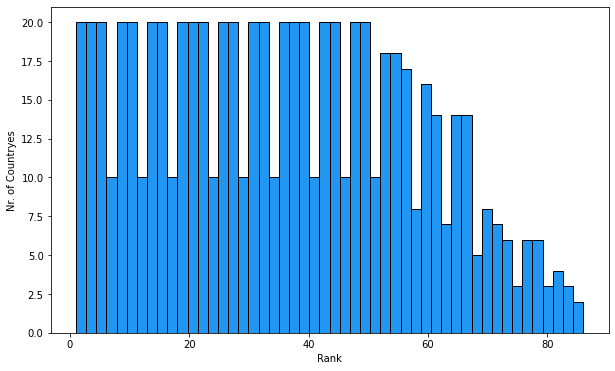

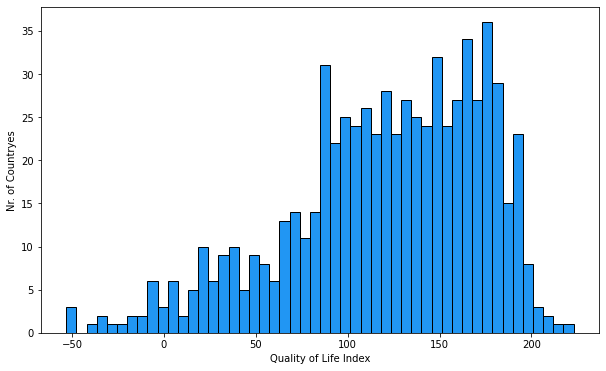

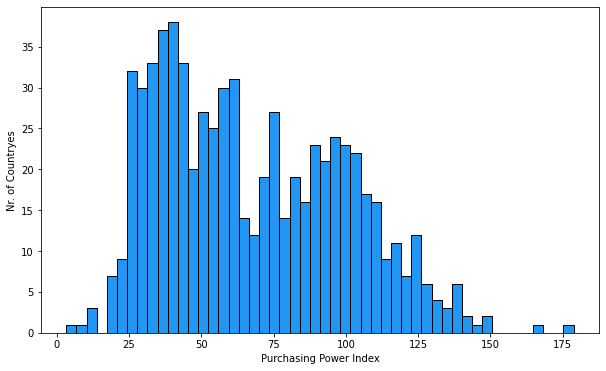

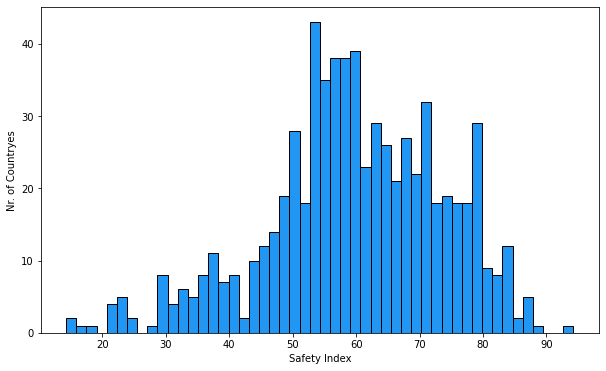

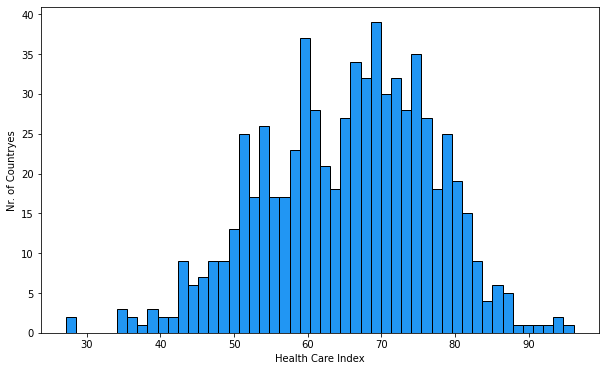

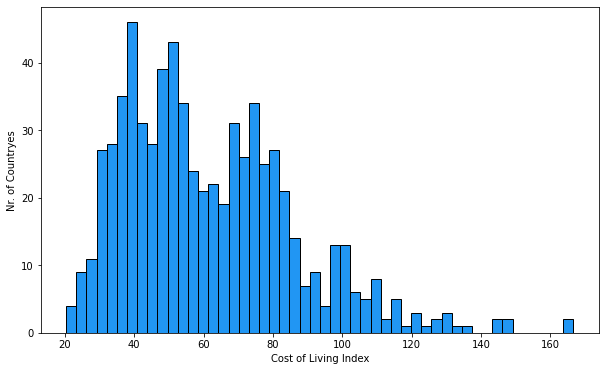

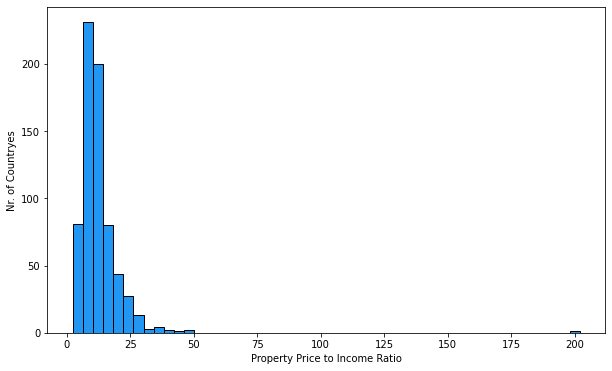

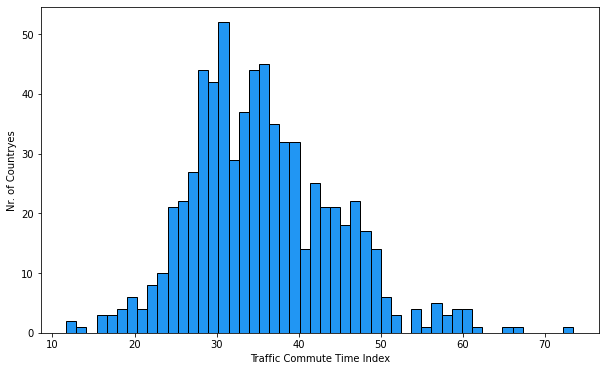

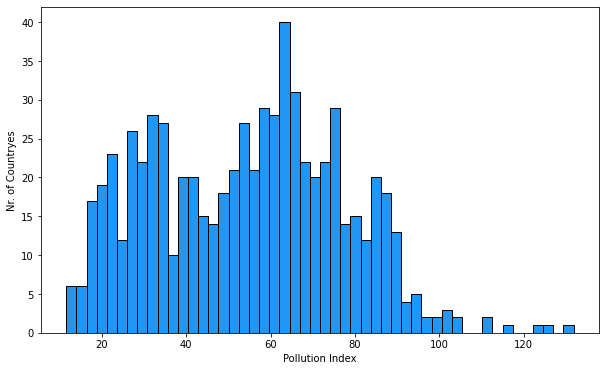

In [6]:
# Просмотрим кол-во странн по индексу
def viewTarget(trg, x_label, y_label):
    plt.figure(figsize=(10, 6))
    plt.hist(trg, bins = 50, ec='black', color = '#2196f3')
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.show()

# Проанализируем графики параметров.
data_on_view = dataset.drop(["Country", "Climate Index", "Year"], axis= 1)
for x in data_on_view.columns:
    viewTarget(data_on_view[x], x, 'Nr. of Countryes')

***Трансформируем рейтинги***

In [7]:
data_on_view['Rank'].skew()

0.20981360042525019

In [8]:
data_on_view['Rank'].min

<bound method NDFrame._add_numeric_operations.<locals>.min of 0       1
1       2
2       3
3       4
4       5
       ..
684    47
685    48
686    49
687    50
688    51
Name: Rank, Length: 689, dtype: int64>

In [9]:
rank_log = np.log(data_on_view['Rank'])
rank_log.tail()

684    3.850148
685    3.871201
686    3.891820
687    3.912023
688    3.931826
Name: Rank, dtype: float64

In [10]:
rank_log.skew() # Искажение

-1.3910208021291979

C:\Users\kuzin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


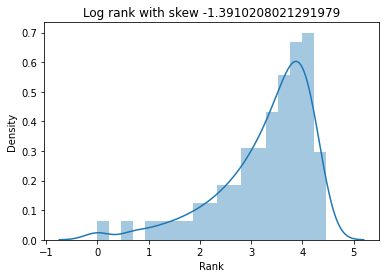

In [11]:
sns.distplot(rank_log)
plt.title(f'Log rank with skew {rank_log.skew()}')
plt.show()

In [12]:
# Поменяем рейтинги на логаримы
# X[:, 0] = rank_log

**Нормализуем нашу банду**

In [13]:
min_max_scaler = preprocessing.MinMaxScaler() # Создаем объект для нормализации
# Нормализуем по мин-макс
X = min_max_scaler.fit_transform(X)
Y = min_max_scaler.fit_transform(Y.reshape(-1, 1))
print(X, Y, sep="\n")

[[0.         0.61354695 0.80487805 ... 0.03112023 0.27591784 0.07098919]
 [0.01176471 0.52101032 0.73771107 ... 0.0223145  0.2752709  0.07356608]
 [0.02352941 0.4592052  0.73145716 ... 0.02576675 0.26103833 0.11413134]
 ...
 [0.56470588 0.13581162 0.51769856 ... 0.04808125 0.76548601 0.94896093]
 [0.57647059 0.24533896 0.42326454 ... 0.05143343 1.         1.        ]
 [0.58823529 0.17190262 0.51569731 ... 0.13859008 0.29112082 0.9247714 ]]
[[0.88361475]
 [0.88067976]
 [0.85640264]
 [0.85451844]
 [0.85299659]
 [0.84991666]
 [0.84114791]
 [0.83266903]
 [0.82908182]
 [0.82111023]
 [0.82107399]
 [0.81571128]
 [0.81324734]
 [0.80165229]
 [0.79723168]
 [0.78817306]
 [0.7803464 ]
 [0.77886079]
 [0.77201246]
 [0.77190376]
 [0.76828031]
 [0.75864193]
 [0.75780854]
 [0.7575549 ]
 [0.75230089]
 [0.73893036]
 [0.73893036]
 [0.73835061]
 [0.73454598]
 [0.72697297]
 [0.72617581]
 [0.71447206]
 [0.71418219]
 [0.71331256]
 [0.6951953 ]
 [0.69450685]
 [0.6777665 ]
 [0.67283861]
 [0.67117182]
 [0.669432

***Пробуем обучить***

*Training & Test Dataset Split*

In [14]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7, random_state = 42)

*Multivaribale Regression*

In [15]:
my_regr = LinearRegression()

my_regr.fit(X_train, y_train)

print("Training data r-squared:", my_regr.score(X_train, y_train))
print("Test data r-squared:", my_regr.score(X_test, y_test))

print("Intercept", my_regr.intercept_)
index_data = data_on_view.drop('Quality of Life Index', axis = 1).columns

pd.DataFrame(data = my_regr.coef_[0], index = index_data, columns=['coef'])


Training data r-squared: 0.8420604146415851
Test data r-squared: 0.7955078091703486
Intercept [0.67928941]


,coef
Rank,-0.128382
Purchasing Power Index,0.460776
Safety Index,0.127055
Health Care Index,0.091977
Cost of Living Index,-0.321109
Property Price to Income Ratio,-0.367748
Traffic Commute Time Index,-0.046710
Pollution Index,-0.468876


**Кореляции**

In [16]:
# Пробуем пандовскую корреляцию
data = dataset.drop(["Country", "Climate Index", "Year"], axis= 1)
data.corr()

,Rank,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index
Rank,1.000000,-0.816595,-0.809118,-0.488500,-0.532872,-0.636159,0.436081,0.520623,0.749297
Quality of Life Index,-0.816595,1.000000,0.750231,0.489623,0.496857,0.398801,-0.381956,-0.437968,-0.780340
Purchasing Power Index,-0.809118,0.750231,1.000000,0.374062,0.468873,0.622491,-0.392783,-0.307387,-0.552010
Safety Index,-0.488500,0.489623,0.374062,1.000000,0.356506,0.287818,-0.085765,-0.353736,-0.381642
Health Care Index,-0.532872,0.496857,0.468873,0.356506,1.000000,0.423169,-0.150185,-0.113404,-0.419307
Cost of Living Index,-0.636159,0.398801,0.622491,0.287818,0.423169,1.000000,-0.202771,-0.270436,-0.494146
Property Price to Income Ratio,0.436081,-0.381956,-0.392783,-0.085765,-0.150185,-0.202771,1.000000,0.237864,0.252518
Traffic Commute Time Index,0.520623,-0.437968,-0.307387,-0.353736,-0.113404,-0.270436,0.237864,1.000000,0.425217
Pollution Index,0.749297,-0.780340,-0.552010,-0.381642,-0.419307,-0.494146,0.252518,0.425217,1.000000


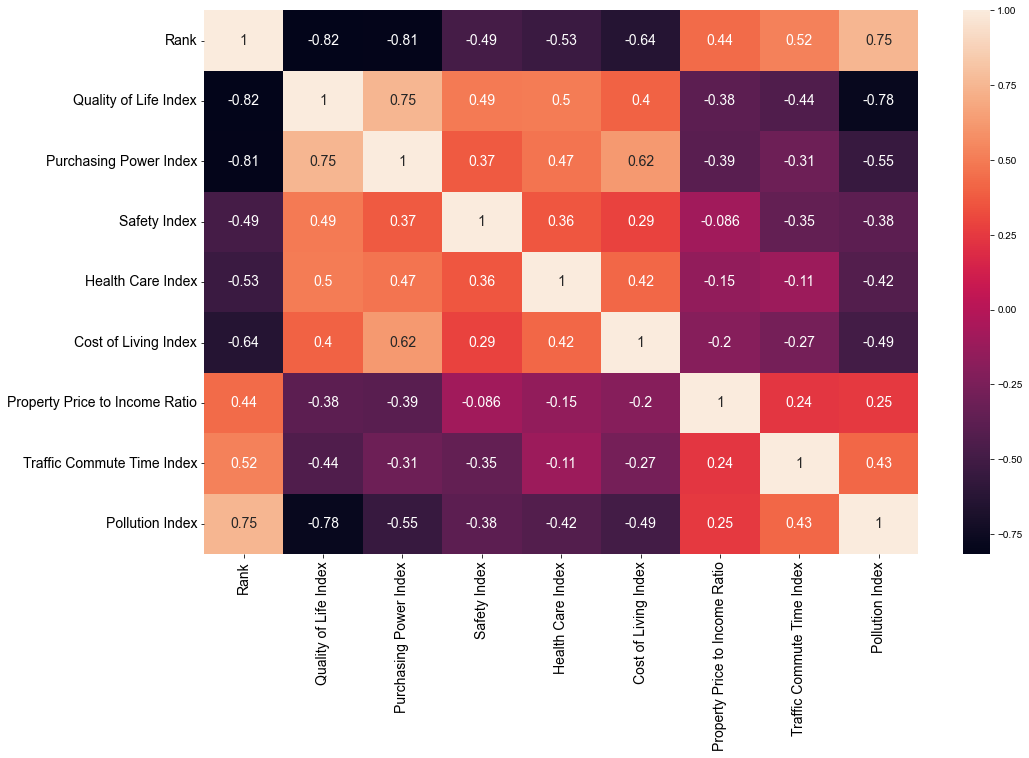

In [17]:
# Визуализируем матрицу с помощью библиотки seaborn
plt.figure(figsize = (16, 10))
sns.heatmap(data.corr(), annot=True, annot_kws={"size": 14})
sns.set_style("white")
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [18]:
# Коррелируем данные numpy-способом(рез-ты идентичны)

dt_coef = np.around(np.corrcoef(np.array([X[:, 0], X[:, 1], X[:, 2], X[:, 3], X[:, 4], X[:, 5], X[:, 6], X[:, 7], Y[:, 0]])), decimals=4)
print(dt_coef)
print(all(map(lambda x: all(map(lambda y: y > 0.11 or y < -0.11, x)), dt_coef)))

[[ 1.     -0.8091 -0.4885 -0.5329 -0.6362  0.4361  0.5206  0.7493 -0.8166]
 [-0.8091  1.      0.3741  0.4689  0.6225 -0.3928 -0.3074 -0.552   0.7502]
 [-0.4885  0.3741  1.      0.3565  0.2878 -0.0858 -0.3537 -0.3816  0.4896]
 [-0.5329  0.4689  0.3565  1.      0.4232 -0.1502 -0.1134 -0.4193  0.4969]
 [-0.6362  0.6225  0.2878  0.4232  1.     -0.2028 -0.2704 -0.4941  0.3988]
 [ 0.4361 -0.3928 -0.0858 -0.1502 -0.2028  1.      0.2379  0.2525 -0.382 ]
 [ 0.5206 -0.3074 -0.3537 -0.1134 -0.2704  0.2379  1.      0.4252 -0.438 ]
 [ 0.7493 -0.552  -0.3816 -0.4193 -0.4941  0.2525  0.4252  1.     -0.7803]
 [-0.8166  0.7502  0.4896  0.4969  0.3988 -0.382  -0.438  -0.7803  1.    ]]
False


In [19]:

# Рисуем график кареляции.
def printCoef(x, y, predict):
    ig, axs = plt.subplots(figsize=(12, 12))
    plt.title(f'Коэф. корреляции: {np.corrcoef(x, y)[0][1]}')
    axs.scatter(x, y, color='black')
    axs.plot(x, predict, color = 'red', linewidth = 3 )
    # axs.plot(x,k_p*X+b_p, color='red')
    plt.show()

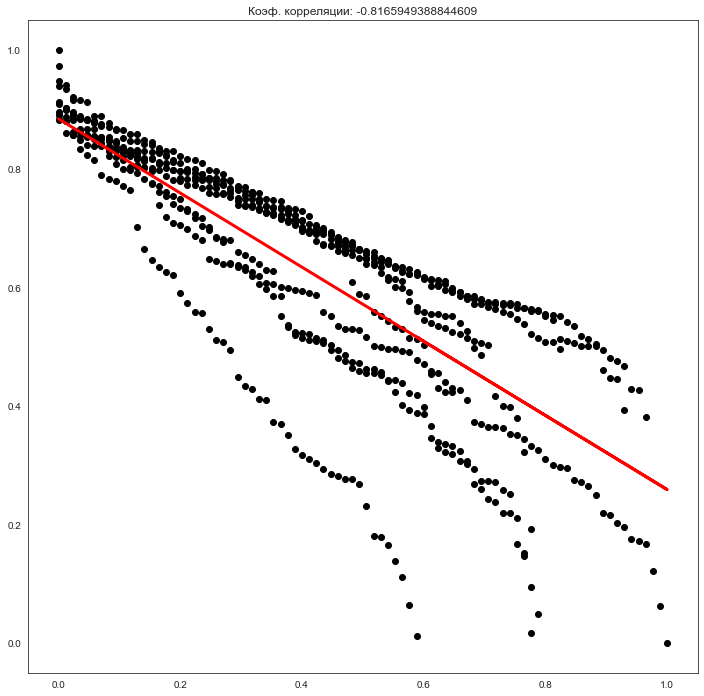

0.6668272942117162


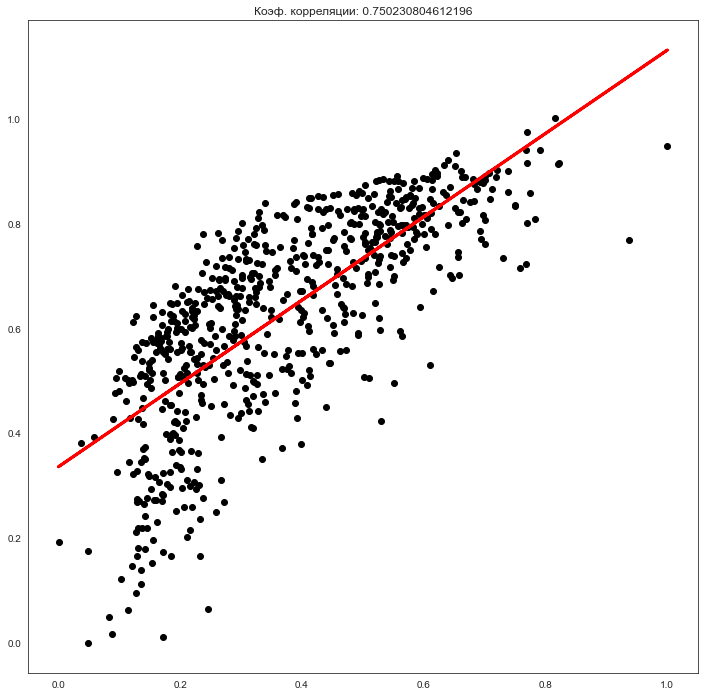

0.5628462601890631


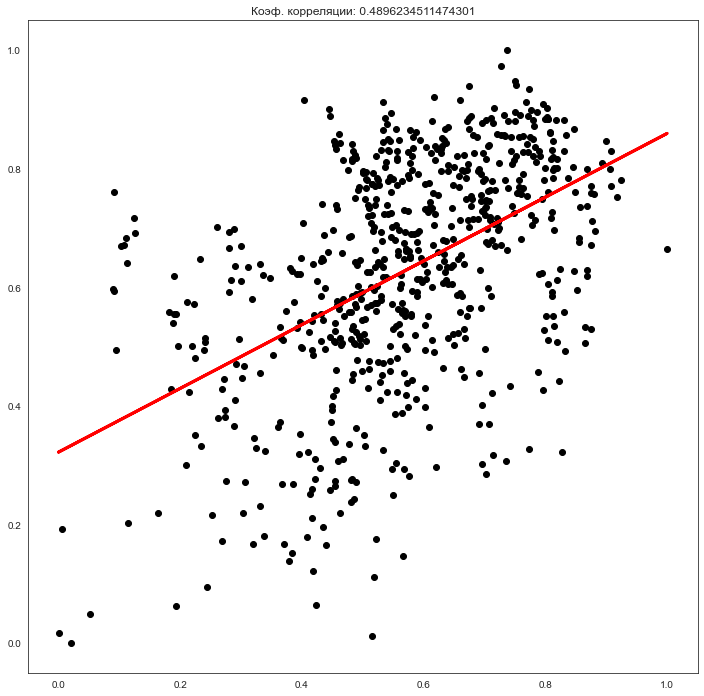

0.23973112391352003


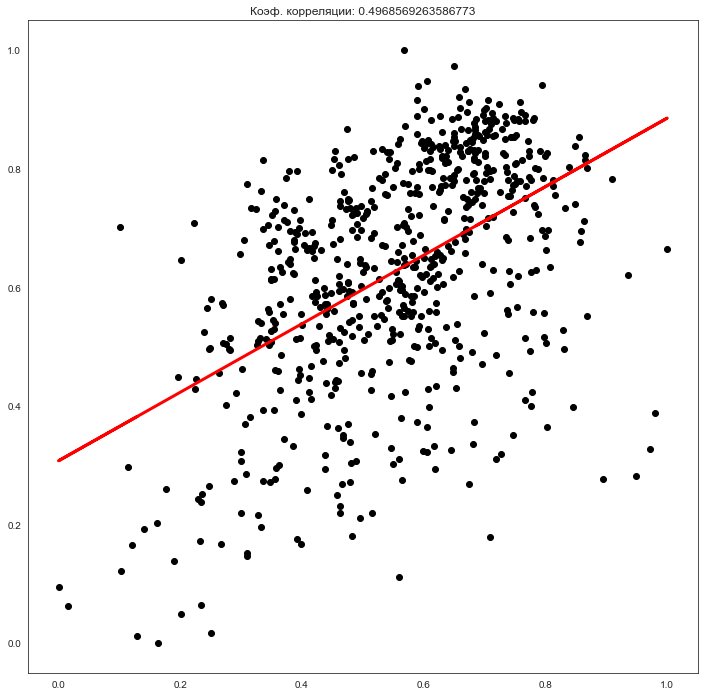

0.24686680527059202


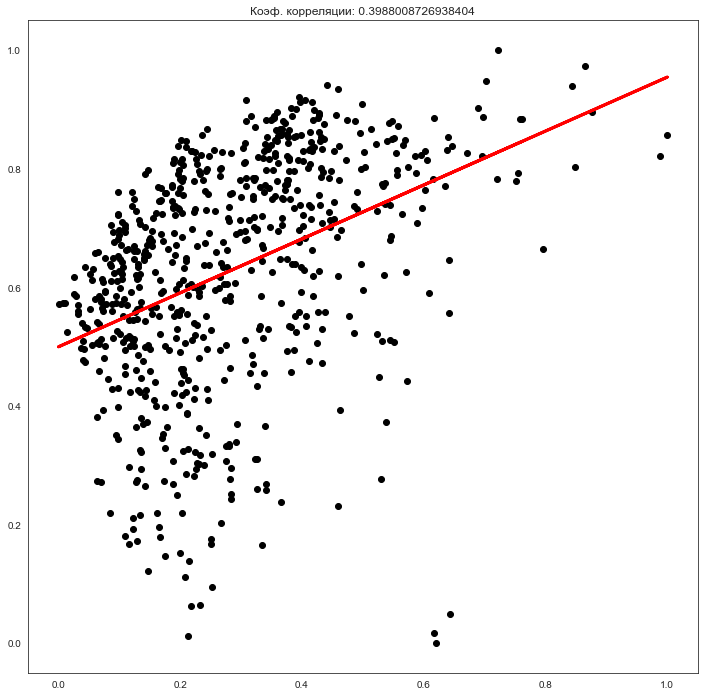

0.15904213606136886


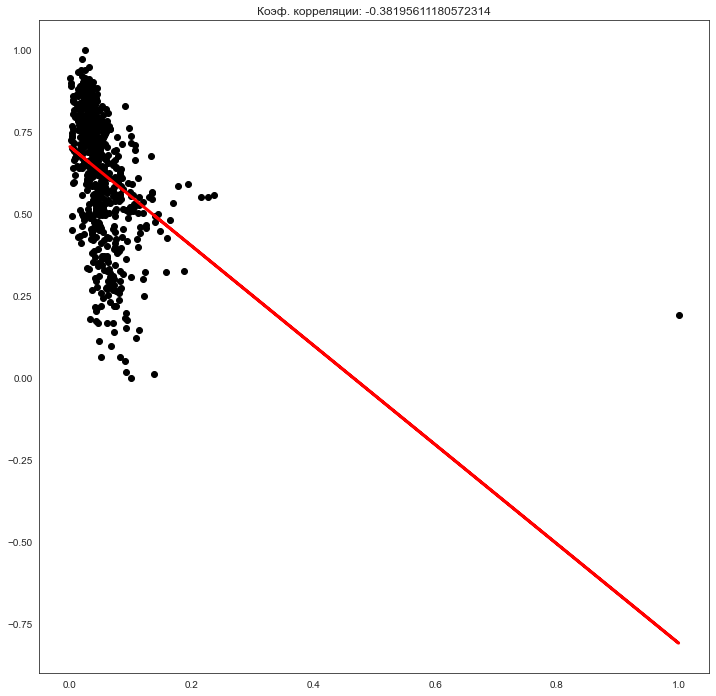

0.1458904713457463


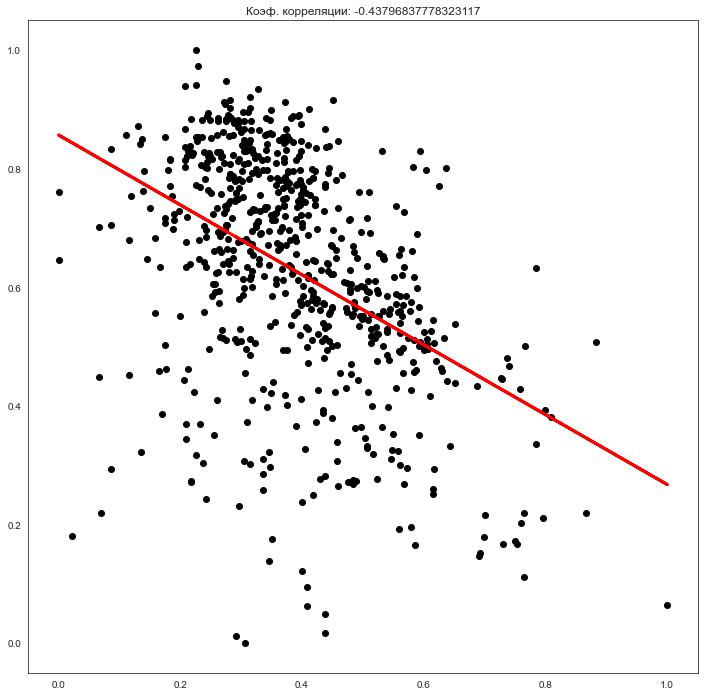

0.19181629993807503


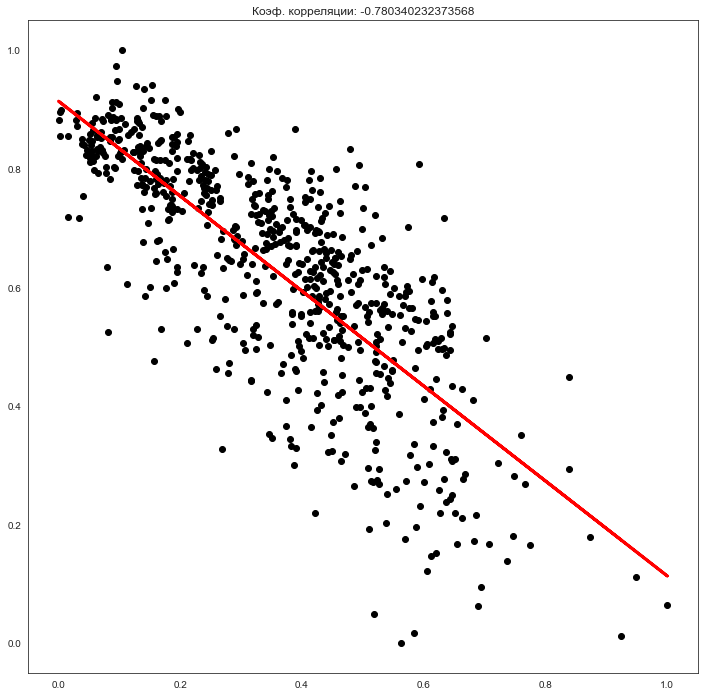

0.6089308782608337


In [20]:

# Применяем линейную регрессию для построения прямой для просмотра корреляции.
model = LinearRegression()

for i in range(X.shape[1]):
    model.fit(X[:,i].reshape(-1,1), Y)
    printCoef(X[:,i], Y[:, 0], model.predict(X[:,i].reshape(-1,1)))
    print(model.score(X[:,i].reshape(-1,1), Y[:, 0]))
